In [1]:
# Site Map Generator

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def make_site_map(
    xlim=(0, 100),
    ylim=(0, 100),
    points=None,
    rectangles=None,
    polygons=None,
    labels=None,
    title="Site Map (Annotated Scatterplot)",
    grid=True,
    grid_spacing=None,
    equal_aspect=True,
    invert_y=False,
    dpi=300,
    outfile_png="site_map.png",
    transparent=True,
    north_arrow=True,
    north_arrow_pos=(0.9, 0.9),
    north_arrow_length=8,
    scale_bar=True,
    scale_bar_pos=(0.1, 0.05),
    scale_bar_length=20,
    scale_bar_units="m",
):
    if points is None: points = []
    if rectangles is None: rectangles = []
    if polygons is None: polygons = []
    if labels is None: labels = {'fontsize': 10, 'offset': (1.5, 1.5)}
    fs = labels.get('fontsize', 10)
    dx, dy = labels.get('offset', (1.5, 1.5))

    fig, ax = plt.subplots(figsize=(8, 6))

    for p in points:
        x, y = p['x'], p['y']
        marker = p.get('marker', 'o')
        size = p.get('size', 50)
        ax.scatter([x], [y], marker=marker, s=size)
        if p.get('label') and p.get('annotate', True):
            ax.annotate(p['label'], (x, y), xytext=(x + dx, y + dy),
                        textcoords='data', fontsize=fs,
                        arrowprops=dict(arrowstyle='-', lw=0.8))

    for r in rectangles:
        xy = r['xy']; width = r['width']; height = r['height']
        lw = r.get('lw', 1.5)
        rect = Rectangle(xy, width, height, fill=False, lw=lw)
        ax.add_patch(rect)
        if r.get('label'):
            rx = xy[0] + width/2.0; ry = xy[1] + height/2.0
            ax.annotate(r['label'], (rx, ry), ha='center', va='center')

    for poly in polygons:
        xy = poly['xy']; lw = poly.get('lw', 12.5)
        closed = poly.get('closed', True)
        poly_patch = Polygon(xy, closed=closed, fill=True, lw=lw)
        ax.add_patch(poly_patch)
        if poly.get('label'):
            cx = sum(pt[0] for pt in xy)/len(xy)
            cy = sum(pt[1] for pt in xy)/len(xy)
            ax.annotate(poly['label'], (cx, cy), ha='center', va='center')

    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    if equal_aspect: ax.set_aspect('equal', adjustable='box')
    if invert_y: ax.invert_yaxis()
    ax.set_title(title)

    if grid: ax.grid(True, which='both', linestyle='--', linewidth=0.6)
    if grid_spacing is not None and grid_spacing > 0:
        from matplotlib.ticker import MultipleLocator
        ax.xaxis.set_major_locator(MultipleLocator(grid_spacing))
        ax.yaxis.set_major_locator(MultipleLocator(grid_spacing))

    plt.tight_layout()
    fig.savefig(outfile_png, dpi=dpi, transparent=transparent, bbox_inches='tight')
    plt.show()
    return fig, ax, outfile_png

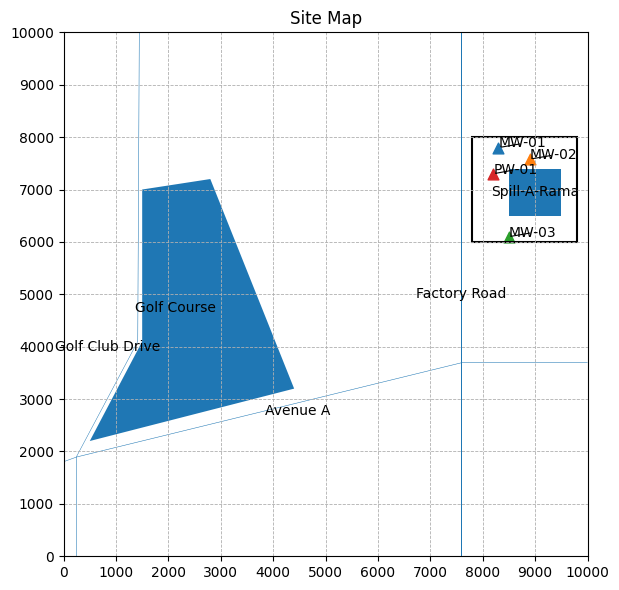

In [3]:
fig, ax, png_path = make_site_map(
    xlim=(0, 10000),
    ylim=(0, 10000),
    points=[
        {'x': 8300, 'y': 7800, 'label': 'MW-01', 'marker': '^', 'size': 60},
        {'x': 8900, 'y': 7580, 'label': 'MW-02', 'marker': '^', 'size': 60},
        {'x': 8500, 'y': 6100, 'label': 'MW-03', 'marker': '^', 'size': 60},
        {'x': 8200, 'y': 7300, 'label': 'PW-01', 'marker': '^', 'size': 60},
    ],
    rectangles=[
        {'xy': (7800, 6000), 'width': 2000, 'height': 2000, 'label': ''},
    ],
    polygons=[
        {'xy': [(500, 2200), (1500, 4100), (1500, 7000), (2800, 7200),(4400, 3200)], 'label': 'Golf Course'},
        {'xy': [(250, 0), (250, 1900), (1420, 4100), (1450, 10000), (1440, 10000), (1410, 4100), (240, 1900), (240, 0)], 'label': 'Golf Club Drive'},
        {'xy': [(0, 1810), (250, 1900), (7600, 3700) ,(10000, 3700) ,(10000, 3690), (7600,3690) , (250, 1890), (0,1800)], 'label': 'Avenue A'},
        {'xy': [(7600, 0), (7600, 10000), (7590, 10000),(7590,0)], 'label': 'Factory Road'},
        {'xy': [(8500, 6500), (8500, 7400), (9500, 7400),(9500,6500)], 'label': 'Spill-A-Rama'},
    ],
    labels={'fontsize': 10, 'offset': (2, 2)},
    title="Site Map",
    grid=True,
    grid_spacing=1000,
    equal_aspect=True,
    invert_y=False,
    dpi=300,
    outfile_png="site_map_homework.png",
    transparent=True,
    north_arrow=True,
    north_arrow_pos=(0.9, 0.9),
    north_arrow_length=8,
    scale_bar=True,
    scale_bar_pos=(0.1, 0.05),
    scale_bar_length=20,
    scale_bar_units="m",
)


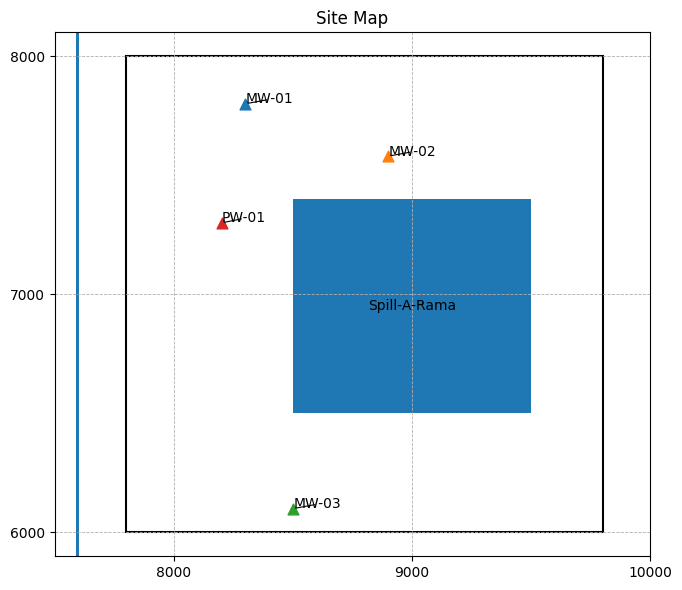

In [4]:
fig, ax, png_path = make_site_map(
    xlim=(7500, 10000),
    ylim=(5900, 8100),
    points=[
        {'x': 8300, 'y': 7800, 'label': 'MW-01', 'marker': '^', 'size': 60},
        {'x': 8900, 'y': 7580, 'label': 'MW-02', 'marker': '^', 'size': 60},
        {'x': 8500, 'y': 6100, 'label': 'MW-03', 'marker': '^', 'size': 60},
        {'x': 8200, 'y': 7300, 'label': 'PW-01', 'marker': '^', 'size': 60},
    ],
    rectangles=[
        {'xy': (7800, 6000), 'width': 2000, 'height': 2000, 'label': ''},
    ],
    polygons=[
        {'xy': [(500, 2200), (1500, 4100), (1500, 7000), (2800, 7200),(4400, 3200)], 'label': 'Golf Course'},
        {'xy': [(250, 0), (250, 1900), (1420, 4100), (1450, 10000), (1440, 10000), (1410, 4100), (240, 1900), (240, 0)], 'label': 'Golf Club Drive'},
        {'xy': [(0, 1810), (250, 1900), (7600, 3700) ,(10000, 3700) ,(10000, 3690), (7600,3690) , (250, 1890), (0,1800)], 'label': 'Avenue A'},
        {'xy': [(7600, 0), (7600, 10000), (7590, 10000),(7590,0)], 'label': 'Factory Road'},
        {'xy': [(8500, 6500), (8500, 7400), (9500, 7400),(9500,6500)], 'label': 'Spill-A-Rama'},
    ],
    labels={'fontsize': 10, 'offset': (2, 2)},
    title="Site Map",
    grid=True,
    grid_spacing=1000,
    equal_aspect=True,
    invert_y=False,
    dpi=300,
    outfile_png="site_map_homework.png",
    transparent=True,
    north_arrow=True,
    north_arrow_pos=(0.9, 0.9),
    north_arrow_length=8,
    scale_bar=True,
    scale_bar_pos=(0.1, 0.05),
    scale_bar_length=20,
    scale_bar_units="m",
)


In [5]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

In [6]:
dgpm=100
dcfm=(dgpm/7.48)
dcmm=dcfm/(3.28**3)
storage=0.000012
hydk = (1.0e-5)*60 #m/min
transmissivity=hydk*100 #f^2/m
discharge=dcmm

#print(s(radius,time,storage,transmissivity,discharge))

In [7]:
time=[1.0,6.0,12.0,18.0,24.0,30.0,60.0,90.0,120.0,240.0,480.0] #minutes
s1=[0 for i in range(len(time))]
s2=[0 for i in range(len(time))]
s3=[0 for i in range(len(time))]

In [8]:
import math
r1= math.sqrt((8300-8200)**2 + (7800-7300)**2)
r2= math.sqrt((8900-8200)**2 + (7580-7300)**2) 
r3= math.sqrt((8500-8200)**2 + (6100-7300)**2)

In [9]:
for i in range(len(time)):
    s1[i]=s(r1,time[i],storage,transmissivity,discharge)
    s2[i]=s(r2,time[i],storage,transmissivity,discharge)
    s3[i]=s(r3,time[i],storage,transmissivity,discharge)



In [10]:
for i in range(len(time)):
    print(time[i],"&",round(s1[i],3),"&",round(s2[i],3),"&",round(s3[i],3),"\\"+"\\")

1.0 & 0.0 & 0.0 & 0.0 \\
6.0 & 0.02 & 0.001 & 0.0 \\
12.0 & 0.096 & 0.015 & 0.0 \\
18.0 & 0.18 & 0.045 & 0.001 \\
24.0 & 0.257 & 0.082 & 0.005 \\
30.0 & 0.326 & 0.121 & 0.012 \\
60.0 & 0.582 & 0.298 & 0.071 \\
90.0 & 0.752 & 0.436 & 0.143 \\
120.0 & 0.88 & 0.546 & 0.212 \\
240.0 & 1.202 & 0.84 & 0.433 \\
480.0 & 1.537 & 1.16 & 0.71 \\


In [11]:
300*1e-4*60

1.8